In [15]:
import numpy as np
import matplotlib.pyplot as plt

import torch

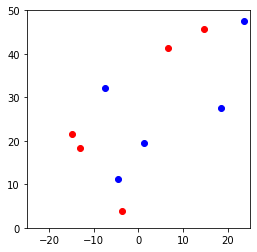

In [35]:
class BasketballEnv():
    def __init__(self, num_off_players, num_def_players, dt=0.1, ball=True):
        self.num_off_players = num_off_players
        self.num_def_players = num_def_players
        self.num_players = self.num_off_players+self.num_def_players
        self.off_player_idxs = torch.arange(self.num_off_players)
        self.def_player_idxs = torch.arange(self.num_off_players, self.num_players)
        
        self.player_radius = 1.
        
        self.dt = dt
        
        self.bound_pos = np.array([[-25., 0.],[25., 50.]])
        self.max_acc = torch.full((self.num_players, ), 1.2)
        self.max_vel = torch.full((self.num_players, ), 1.2)
        
        self.reset()
    
    def bound_vec(self, v, max_mag):
        mag = v.norm(dim=-1, keepdim=True)
        newmag = torch.clip(mag, 0., max_mag)
        v = v*newmag/mag
        return v
    
    def bound_pos(self, pos, bound_pos):
        lower, upper = bound_pos
        pos = torch.maximum(pos, lower)
        pos = torch.minimum(pos, upper)
        return pos
        
        
    def step(self, action):
        acc, ball_pass_idx, shot = action
        self.acc = acc
        self.acc = self.bound_vec(self.acc, self.max_acc)
        
        self.vel = self.vel + dt*self.acc
        self.vel = self.bound_vec(self.vel, self.max_vel)
        
        
        x = self.pos
        dx = dt*self.vel
        
        nx = x+dx
        
        self.pos = self.pos + dt*self.vel
        self.pos = self.bound_pos(self.pos, self.bound_pos)
        
        self.done = shot
        
        reward = 0
        
        
    
    def reset(self):
        lower, upper = self.bound_pos
        self.pos = (torch.rand((self.num_players, 2))*(upper-lower))+lower
        
        self.vel = torch.zeros((self.num_players, 2))
        self.acc = torch.zeros((self.num_players, 2))
        self.done = False
        
    
    def render(self, mode='human', close=False):
        plt.figure(figsize=(4,4))
        off_pos = self.pos[self.off_player_idxs]
        def_pos = self.pos[self.def_player_idxs]
        plt.scatter(*off_pos.transpose(-1, -2).numpy(), c='r')
        plt.scatter(*def_pos.transpose(-1, -2).numpy(), c='b')
        
        plt.xlim(*self.bound_pos[:, 0]);plt.ylim(*self.bound_pos[:, 1])
        
        plt.show()
    
    def close(self):
        pass

env = BasketballEnv(5, 5)
env.render()

network output: 

\[dx1 dx2 dx3 dx4 dx5\]

\[keep ball, chest pass to p1, bounce pass to p1, lob pass to p1, chest pass to p2, ...\]


later I should switch to using a 2D physics engine like Box2D to handle advanced physics problems like tunneling, etc.

In [3]:
from Box2D import *
from Box2D.b2 import *


In [39]:
world = b2World()
b2BodyDef()
body1 = world.CreateDynamicBody()
body2 = world.CreateBody()
# joint = world.CreateJoint(b2JointDef())

In [41]:
body1.position = b2Vec2(0., 10.)
body2.position = b2Vec2(0., 0.)

for i in range(100):
    world.Step(1/60., 6, 2)
    print(body1.position)

b2Vec2(0,9.96389)
b2Vec2(0,9.925)
b2Vec2(0,9.88333)
b2Vec2(0,9.83889)
b2Vec2(0,9.79167)
b2Vec2(0,9.74167)
b2Vec2(0,9.68889)
b2Vec2(0,9.63333)
b2Vec2(0,9.575)
b2Vec2(0,9.51389)
b2Vec2(0,9.45)
b2Vec2(0,9.38333)
b2Vec2(0,9.31389)
b2Vec2(0,9.24167)
b2Vec2(0,9.16667)
b2Vec2(0,9.08889)
b2Vec2(0,9.00833)
b2Vec2(0,8.925)
b2Vec2(0,8.83889)
b2Vec2(0,8.75)
b2Vec2(0,8.65833)
b2Vec2(0,8.56389)
b2Vec2(0,8.46667)
b2Vec2(0,8.36667)
b2Vec2(0,8.26389)
b2Vec2(0,8.15833)
b2Vec2(0,8.05)
b2Vec2(0,7.93889)
b2Vec2(0,7.825)
b2Vec2(0,7.70833)
b2Vec2(0,7.58889)
b2Vec2(0,7.46667)
b2Vec2(0,7.34167)
b2Vec2(0,7.21389)
b2Vec2(0,7.08333)
b2Vec2(0,6.95)
b2Vec2(0,6.81389)
b2Vec2(0,6.675)
b2Vec2(0,6.53333)
b2Vec2(0,6.38889)
b2Vec2(0,6.24167)
b2Vec2(0,6.09167)
b2Vec2(0,5.93889)
b2Vec2(0,5.78333)
b2Vec2(0,5.625)
b2Vec2(0,5.46389)
b2Vec2(0,5.3)
b2Vec2(0,5.13333)
b2Vec2(0,4.96389)
b2Vec2(0,4.79167)
b2Vec2(0,4.61667)
b2Vec2(0,4.43889)
b2Vec2(0,4.25833)
b2Vec2(0,4.075)
b2Vec2(0,3.88889)
b2Vec2(0,3.7)
b2Vec2(0,3.50833)
b2Vec2(0